# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True, dummy_na=False)

In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [6]:
enc = OneHotEncoder(handle_unknown='ignore')

#fit to species column
enc.fit(df[['species']])

#transform species column
encoded_species = enc.transform(df[['species']]).toarray()

#create new dataframe with onehotencoded species
df_encoded_species = pd.DataFrame(encoded_species, columns=enc.get_feature_names_out(['species']))

#concat original dataframe with new dataframe
df_encoded = pd.concat([df, df_encoded_species], axis=1)

df_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
df_encoded_clean = df_encoded.dropna()
target = 'bill_depth_mm'
predictors = df_encoded_clean.drop(columns=[target, 'species'])  # remove target and species columns

#train and test data
X_train, X_test, y_train, y_test = train_test_split(
    predictors, df_encoded_clean[target], test_size=0.2, random_state=42
)

In [10]:
predictor_sets = {
    "Model 1": ['bill_length_mm'],
    "Model 2": ['bill_length_mm', 'flipper_length_mm'],
    "Model 3": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    "Model 4": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo'] #was unsure of how to do the fourth model
}

In [11]:
train_errors = []
test_errors = []
models = {}

#function to help make it easier
for model_name, features in predictor_sets.items():
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    models[model_name] = model

    #training error
    y_train_pred = model.predict(X_train_subset)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

    #test error
    y_test_pred = model.predict(X_test_subset)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

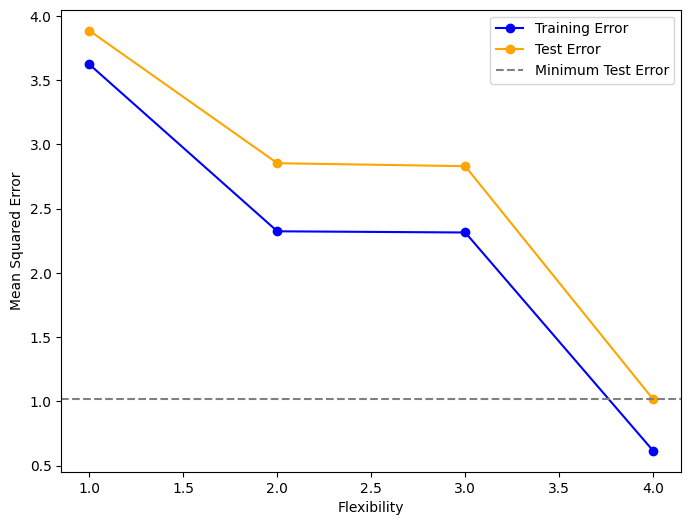

In [20]:
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

#used ChatGPT to help with the flexibility part - still don't know if I did this right
flexibility = np.arange(1, len(train_errors) + 1)

plt.figure(figsize=(8, 6))

#plotting the training and test errors for each flexibility level
plt.plot(flexibility, train_errors, label="Training Error", marker='o', linestyle='-', color='blue')
plt.plot(flexibility, test_errors, label="Test Error", marker='o', linestyle='-', color='orange')

#labels
plt.xlabel("Flexibility")
plt.ylabel("Mean Squared Error")
plt.axhline(y=np.min(test_errors), color='gray', linestyle='--', label="Minimum Test Error")  #reference line (as shown in Fig 1 in the course book) used ChatGPT for this too
plt.legend()

plt.show()

Since Model 4 had the lowest MSE, I think Model 4 is the best one out of the four models.